In [145]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

#libraries for label encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#for feature selection 
from sklearn.ensemble import ExtraTreesClassifier

#linear regression model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics  

from scipy import stats

#Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.metrics import accuracy_score


In [146]:
import os
working_directory=os.getcwd()
print(working_directory)

/Users/riyahanda


In [147]:
path=working_directory+"/Downloads/datarent.xlsx"
data=pd.read_excel(path)

### DATA ANALYSIS

#### Basic Information about Dataset

In [148]:
data.head()

,id,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,deposit
0,ff8081815917971401591af8895032d0,BHK2,Jayanagara,12.936601,77.576914,FAMILY,0.0,0,0,0,...,S,2,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORP_BORE,IF,1,22000,220000
1,ff80818157dbe1fb0157dc4aa07513dc,BHK2,Basaveshwar Nagar,12.997989,77.545219,FAMILY,0.0,0,0,1,...,W,2,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,20000,200000
2,ff8081815d304406015d30edcd7c4f44,BHK3,"Jaya Nagar East,Jayanagar",12.935696,77.587642,FAMILY,0.0,1,0,0,...,E,3,4,9,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORPORATION,AP,2,38000,250000
3,ff8081815b106986015b154d908f2ac2,BHK2,Murugeshpalya,12.953507,77.656118,FAMILY,0.0,1,0,1,...,E,2,4,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",BOREWELL,AP,1,30000,300000
4,ff8081815e80b789015e84a7a42a62a3,BHK2,Whitefield,12.968520,77.742436,ANYONE,1.0,1,1,1,...,E,2,1,9,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2,26500,150000


In [149]:
data.shape

(25000, 25)

In [150]:
data.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,cup_board,floor,total_floor,balconies,rent,deposit
count,24873.000000,24875.000000,24989.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,2.500000e+04
mean,12.945884,77.637510,0.226180,0.362440,0.174600,0.712920,1063.764160,5.780800,4.137840,1.881600,3.810480,1.15212,19075.588600,1.443088e+05
std,0.029612,0.111891,0.418365,0.480715,0.379632,0.452408,591.174731,8.831735,303.733079,2.187879,3.201751,1.00891,8468.705114,1.119179e+05
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,8000.000000,0.000000e+00
25%,12.918508,77.572039,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,2.000000,0.00000,12500.000000,8.075050e+04
50%,12.943883,77.633469,0.000000,0.000000,0.000000,1.000000,1050.000000,5.000000,2.000000,1.000000,3.000000,1.00000,17500.000000,1.200000e+05
75%,12.971101,77.695972,0.000000,1.000000,0.000000,1.000000,1290.000000,10.000000,3.000000,3.000000,4.000000,2.00000,24000.000000,2.000000e+05
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,999.000000,48026.000000,25.000000,50.000000,22.00000,50000.000000,8.000000e+06


In [151]:
#determine the type of data for each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             25000 non-null  object 
 1   type           25000 non-null  object 
 2   locality       25000 non-null  object 
 3   latitude       24873 non-null  float64
 4   longitude      24875 non-null  float64
 5   lease_type     25000 non-null  object 
 6   gym            24989 non-null  float64
 7   lift           25000 non-null  int64  
 8   swimming_pool  25000 non-null  int64  
 9   negotiable     25000 non-null  int64  
 10  furnishing     25000 non-null  object 
 11  parking        25000 non-null  object 
 12  property_size  25000 non-null  int64  
 13  property_age   25000 non-null  int64  
 14  bathroom       25000 non-null  object 
 15  facing         25000 non-null  object 
 16  cup_board      25000 non-null  int64  
 17  floor          25000 non-null  int64  
 18  total_

##### Therefore, we have some wrong format data in 'bathroom' column as its type is object instead of int

In [152]:
data.count()

id               25000
type             25000
locality         25000
latitude         24873
longitude        24875
lease_type       25000
gym              24989
lift             25000
swimming_pool    25000
negotiable       25000
furnishing       25000
parking          25000
property_size    25000
property_age     25000
bathroom         25000
facing           25000
cup_board        25000
floor            25000
total_floor      25000
amenities        25000
water_supply     25000
building_type    25000
balconies        25000
rent             25000
deposit          25000
dtype: int64

##### Therefore, we have missing values in 'Longitude' , 'Latitude' and ' Gym' columns

##### Finding total no of missing values in each column

In [153]:
#check for null values in dataset
data.isnull().sum()

id                 0
type               0
locality           0
latitude         127
longitude        125
lease_type         0
gym               11
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
deposit            0
dtype: int64

<Axes: >

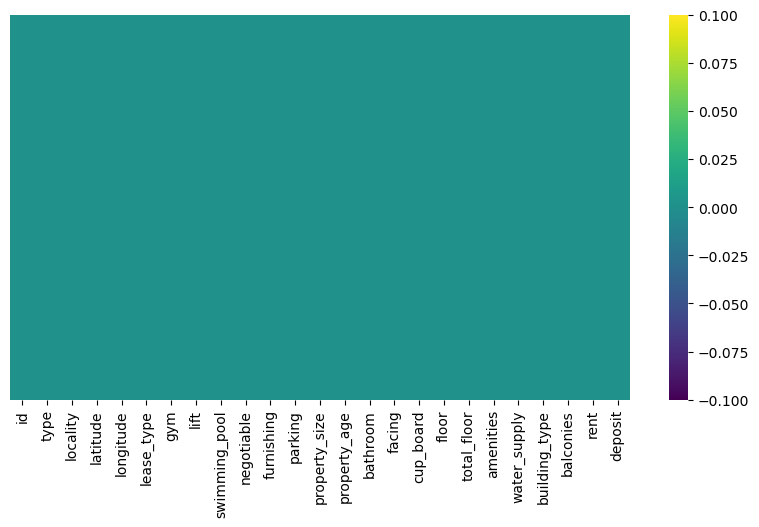

In [165]:
#null values via heatmap
pt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False,cmap = 'viridis')

### DATA PREPROCESSING

In [154]:
# handling missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data.latitude = imputer.fit_transform(data['latitude'].values.reshape(-1,1))[:,0]
data.longitude = imputer.fit_transform(data['longitude'].values.reshape(-1,1))[:,0]


In [155]:
data['longitude']

0        77.576914
1        77.545219
2        77.587642
3        77.656118
4        77.742436
           ...    
24995    77.688017
24996    77.665004
24997    77.666543
24998    77.603983
24999    77.715234
Name: longitude, Length: 25000, dtype: float64

In [156]:
data['latitude']

0        12.936601
1        12.997989
2        12.935696
3        12.953507
4        12.968520
           ...    
24995    12.969708
24996    12.992878
24997    12.992564
24998    12.931328
24999    12.946809
Name: latitude, Length: 25000, dtype: float64

In [157]:
# handling wrong datatype format values

for column in data.columns:
    data['bathroom'] = data['bathroom'].replace("two", 2)
    data['bathroom'] = data['bathroom'].replace('one',1)

data['bathroom']

0        2
1        3
2        3
3        2
4        2
        ..
24995    2
24996    1
24997    1
24998    1
24999    2
Name: bathroom, Length: 25000, dtype: int64

In [158]:
# replacing the values 
data['gym'].fillna(0, inplace = True)
data['gym']

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
24995    0.0
24996    0.0
24997    0.0
24998    0.0
24999    0.0
Name: gym, Length: 25000, dtype: float64

In [159]:
#check for null values in dataset
data.isnull().sum()

id               0
type             0
locality         0
latitude         0
longitude        0
lease_type       0
gym              0
lift             0
swimming_pool    0
negotiable       0
furnishing       0
parking          0
property_size    0
property_age     0
bathroom         0
facing           0
cup_board        0
floor            0
total_floor      0
amenities        0
water_supply     0
building_type    0
balconies        0
rent             0
deposit          0
dtype: int64

#### Total no of Categorical, Float and Integer Variables

In [160]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
for object in object_cols:
    print(object)
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print()
print("Integer variables:",len(num_cols))
for integer in num_cols:
    print(integer)
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print()
print("Float variables:",len(fl_cols))
for fl in fl_cols:
    print(fl)

Categorical variables: 10
id
type
locality
lease_type
furnishing
parking
facing
amenities
water_supply
building_type

Integer variables: 12
lift
swimming_pool
negotiable
property_size
property_age
bathroom
cup_board
floor
total_floor
balconies
rent
deposit

Float variables: 3
latitude
longitude
gym


### DATA CLEANING

<Axes: title={'center': 'No. of Unique values of Categorical Features'}>

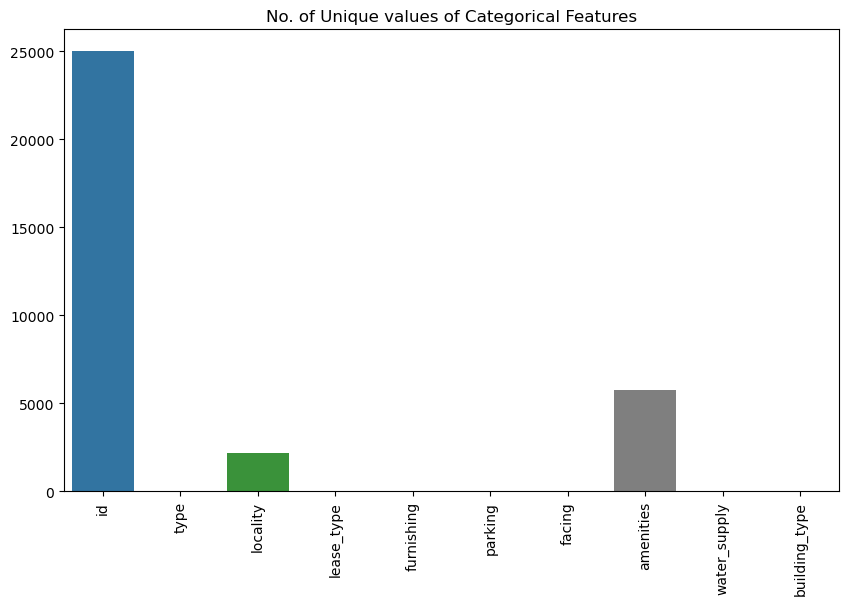

In [161]:
unique_values = []
for col in object_cols:
  unique_values.append(data[col].unique().size)
pt.figure(figsize=(10,6))
pt.title('No. of Unique values of Categorical Features')
pt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

#### HANDLING CATEGORICAL VARIABLES

In [19]:
#Using label encoder to transform categorical data of locality feature into integer

le=preprocessing.LabelEncoder()
data['locality']=le.fit_transform(data['locality'])
data['locality'].head()

0    1061
1     419
2    1027
3    1443
4    2084
Name: locality, dtype: int64

In [20]:
#determining number of unique values in locality

a=np.unique(data['locality'])
a.shape

(2177,)

In [21]:
#applying label encoder to other features containing categorical data

data['type']=le.fit_transform(data['type'])
data['lease_type']=le.fit_transform(data['lease_type'])
data['furnishing']=le.fit_transform(data['furnishing'])
data['parking']=le.fit_transform(data['parking'])
data['facing']=le.fit_transform(data['facing'])
data['water_supply']=le.fit_transform(data['water_supply'])
data['building_type']=le.fit_transform(data['building_type'])

In [22]:
data.head()

,id,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,deposit
0,ff8081815917971401591af8895032d0,1,1061,12.936601,77.576914,3,0.0,0,0,0,...,4,2,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",2,2,1,22000,220000
1,ff80818157dbe1fb0157dc4aa07513dc,1,419,12.997989,77.545219,3,0.0,0,0,1,...,7,2,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,3,0,20000,200000
2,ff8081815d304406015d30edcd7c4f44,2,1027,12.935696,77.587642,3,0.0,1,0,0,...,0,3,4,9,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",1,0,2,38000,250000
3,ff8081815b106986015b154d908f2ac2,1,1443,12.953507,77.656118,3,0.0,1,0,1,...,0,2,4,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",0,0,1,30000,300000
4,ff8081815e80b789015e84a7a42a62a3,1,2084,12.968520,77.742436,0,1.0,1,1,1,...,0,2,1,9,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",2,0,2,26500,150000


In [23]:
#working with amenities feature

data['amenities'].head()

0    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
1    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
2    {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...
3    {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...
4    {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
Name: amenities, dtype: object

In [24]:
#replacing true and false in amenities feature with 1 and 0 respectively

data['amenities']=data['amenities'].str.replace('false','0')
data['amenities']=data['amenities'].str.replace('true','1') 
data['amenities'].head()

0    {"LIFT":0,"GYM":0,"INTERNET":0,"AC":0,"CLUB":0...
1    {"LIFT":0,"GYM":0,"INTERNET":0,"AC":0,"CLUB":0...
2    {"LIFT":1,"GYM":0,"INTERNET":1,"AC":0,"CLUB":1...
3    {"LIFT":1,"GYM":0,"INTERNET":1,"AC":0,"CLUB":0...
4    {"LIFT":1,"GYM":1,"INTERNET":1,"AC":0,"CLUB":1...
Name: amenities, dtype: object

In [25]:
#splitting the amenities feature into various columns

df1 = data
df1["amenities"] = df1["amenities"].apply(lambda x : dict(eval(str(x)))) #parses the string
df2 = df1["amenities"].apply(pd.Series )
df2.head()

,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,POOL,CPA,FS,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
#concatenating the above columns in the original dataset

data = pd.concat([data, df2], axis=1)
data.head()

,id,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,ff8081815917971401591af8895032d0,1,1061,12.936601,77.576914,3,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ff80818157dbe1fb0157dc4aa07513dc,1,419,12.997989,77.545219,3,0.0,0,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ff8081815d304406015d30edcd7c4f44,2,1027,12.935696,77.587642,3,0.0,1,0,0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,ff8081815b106986015b154d908f2ac2,1,1443,12.953507,77.656118,3,0.0,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,ff8081815e80b789015e84a7a42a62a3,1,2084,12.968520,77.742436,0,1.0,1,1,1,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [27]:
#dropping repeated columns

data.drop(['amenities','gym','LIFT','POOL'],axis=1,inplace=True)

In [28]:
#view all columns in the dataset now

data.columns

Index(['id', 'type', 'locality', 'latitude', 'longitude', 'lease_type', 'lift',
       'swimming_pool', 'negotiable', 'furnishing', 'parking', 'property_size',
       'property_age', 'bathroom', 'facing', 'cup_board', 'floor',
       'total_floor', 'water_supply', 'building_type', 'balconies', 'rent',
       'deposit', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'CPA', 'FS',
       'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB',
       'VP'],
      dtype='object')

In [29]:
#checking null values in the dataset for the added columns

data.isnull().sum()


id                  0
type                0
locality            0
latitude            0
longitude           0
lease_type          0
lift                0
swimming_pool       0
negotiable          0
furnishing          0
parking             0
property_size       0
property_age        0
bathroom            0
facing              0
cup_board           0
floor               0
total_floor         0
water_supply        0
building_type       0
balconies           0
rent                0
deposit             0
GYM                82
INTERNET            0
AC                  0
CLUB             1283
INTERCOM            0
CPA              1283
FS                  0
SERVANT          1283
SECURITY            0
SC                  0
GP               1283
PARK                0
RWH              1283
STP              1283
HK                  0
PB                  0
VP               1283
dtype: int64

In [30]:
#filling null values in columns with 0 as no information about these amenities is given

data[['CLUB','CPA','GP','RWH','SERVANT','STP','GYM','VP']] = data[['CLUB','CPA','GP','RWH','SERVANT','STP','GYM','VP']].fillna(0,axis = 1,inplace=False)

In [31]:
data.isnull().sum()

id               0
type             0
locality         0
latitude         0
longitude        0
lease_type       0
lift             0
swimming_pool    0
negotiable       0
furnishing       0
parking          0
property_size    0
property_age     0
bathroom         0
facing           0
cup_board        0
floor            0
total_floor      0
water_supply     0
building_type    0
balconies        0
rent             0
deposit          0
GYM              0
INTERNET         0
AC               0
CLUB             0
INTERCOM         0
CPA              0
FS               0
SERVANT          0
SECURITY         0
SC               0
GP               0
PARK             0
RWH              0
STP              0
HK               0
PB               0
VP               0
dtype: int64

#### FEATURE ENGINEERING

In [32]:
#dropping id as rent is not dependent on it

data.drop(['id'],axis=1,inplace=True)

In [33]:
data.head()

,type,locality,latitude,longitude,lease_type,lift,swimming_pool,negotiable,furnishing,parking,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,1,1061,12.936601,77.576914,3,0,0,0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,419,12.997989,77.545219,3,0,0,1,2,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1027,12.935696,77.587642,3,1,0,0,2,0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1,1443,12.953507,77.656118,3,1,0,1,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,2084,12.968520,77.742436,0,1,1,1,2,0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Checking if all data is numerical

In [34]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           25000 non-null  int64  
 1   locality       25000 non-null  int64  
 2   latitude       25000 non-null  float64
 3   longitude      25000 non-null  float64
 4   lease_type     25000 non-null  int64  
 5   lift           25000 non-null  int64  
 6   swimming_pool  25000 non-null  int64  
 7   negotiable     25000 non-null  int64  
 8   furnishing     25000 non-null  int64  
 9   parking        25000 non-null  int64  
 10  property_size  25000 non-null  int64  
 11  property_age   25000 non-null  int64  
 12  bathroom       25000 non-null  int64  
 13  facing         25000 non-null  int64  
 14  cup_board      25000 non-null  int64  
 15  floor          25000 non-null  int64  
 16  total_floor    25000 non-null  int64  
 17  water_supply   25000 non-null  int64  
 18  buildi

In [35]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
for object in object_cols:
    print(object)
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print()
print("Integer variables:",len(num_cols))
for integer in num_cols:
    print(integer)
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print()
print("Float variables:",len(fl_cols))
for fl in fl_cols:
    print(fl)

Categorical variables: 0

Integer variables: 20
type
locality
lease_type
lift
swimming_pool
negotiable
furnishing
parking
property_size
property_age
bathroom
facing
cup_board
floor
total_floor
water_supply
building_type
balconies
rent
deposit

Float variables: 19
latitude
longitude
GYM
INTERNET
AC
CLUB
INTERCOM
CPA
FS
SERVANT
SECURITY
SC
GP
PARK
RWH
STP
HK
PB
VP


#### DATA VISUALISATION


[0.02501281 0.06830875 0.071904   0.07580244 0.0244666  0.0075847
 0.00471577 0.02076266 0.01274608 0.02069716 0.07215829 0.06325151
 0.02149957 0.04882026 0.04096885 0.05177194 0.05166344 0.03720723
 0.01879155 0.04036404 0.00617079 0.02727613 0.0052785  0.00567798
 0.00836076 0.01561282 0.00953602 0.00439225 0.01155919 0.02651805
 0.00979784 0.02390694 0.01629154 0.01358489 0.01331136 0.00806605
 0.01616125]


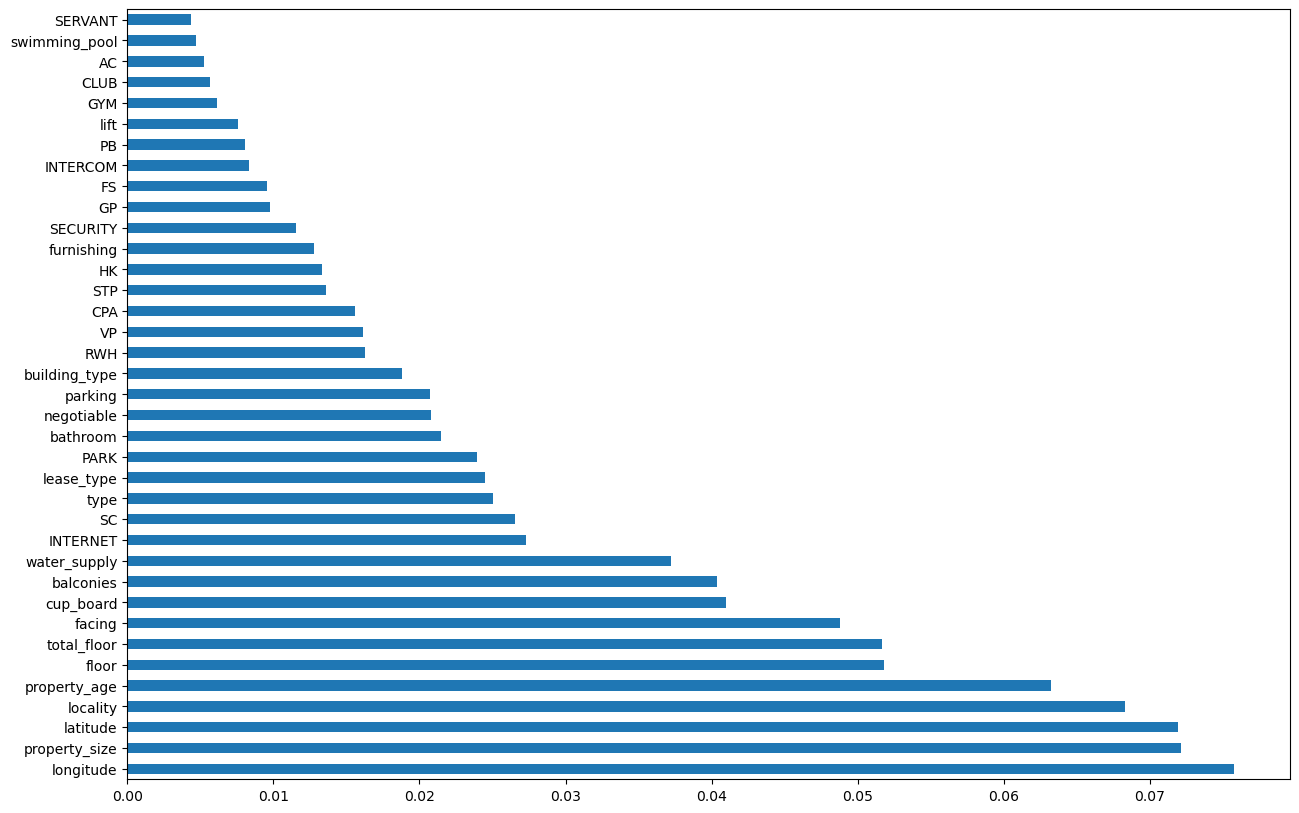

In [36]:
#Using ExtraTreesClassifier for predicting the importance of features for rent determination
pt.figure(figsize=(15,10))
x=data.drop(['rent','deposit'],axis=1)
y=data['rent']
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(37).plot(kind='barh') #37 columns in total in x
pt.show()

<Axes: >

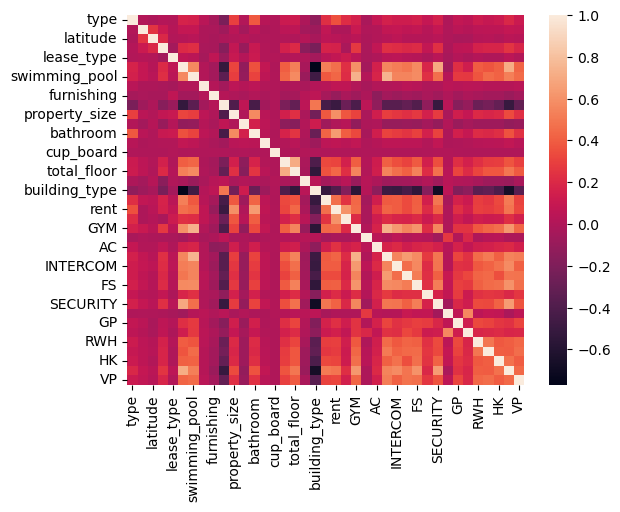

In [37]:
# data visualisation
# building the correlation matrix
sns.heatmap(data.corr())

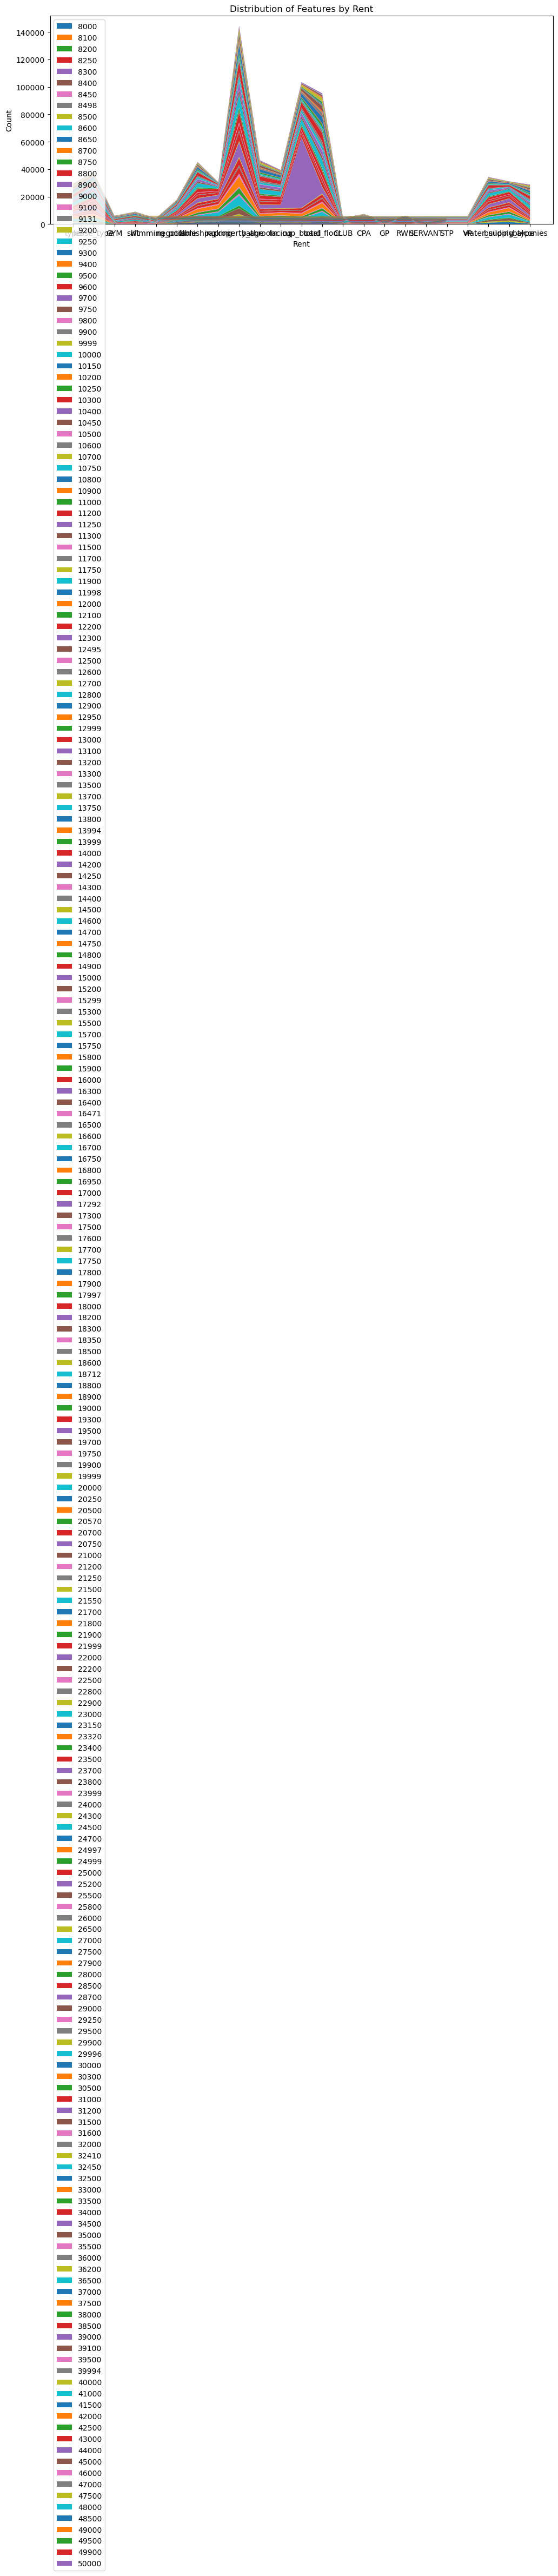

In [38]:
# Select features for the stackplot
features = ['type', 'lease_type', 'GYM', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
            'parking', 'property_age', 'bathroom', 'facing', 'cup_board', 'total_floor','CLUB','CPA','GP','RWH','SERVANT','STP','GYM','VP' ,
            'water_supply', 'building_type', 'balconies']

# Subset the data with selected features and the target variable
dataset = data[features + ['rent']]

# Prepare data for the stackplot
grouped_data = dataset.groupby('rent').sum().T

# Plotting the stackplot
pt.figure(figsize=(12, 5))
pt.stackplot(grouped_data.index, *grouped_data.values.T, labels=grouped_data.columns)

# Set labels and title
pt.xlabel('Rent')
pt.ylabel('Count')
pt.title('Distribution of Features by Rent')

# Display the legend
pt.legend(loc='upper left')

# Show the plot
pt.show()

/var/folders/s6/xlwdvv0547ld268t3lhsprb00000gn/T/ipykernel_60344/2944242366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['longitude'], bins=4)


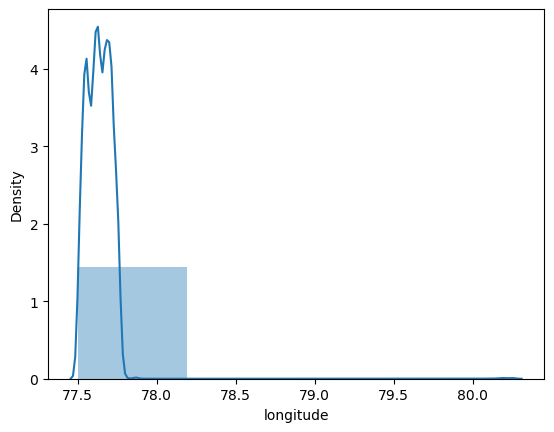

In [39]:
sns.distplot(data['longitude'], bins=4)
pt.show()

/var/folders/s6/xlwdvv0547ld268t3lhsprb00000gn/T/ipykernel_60344/403804389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['latitude'], bins=10)


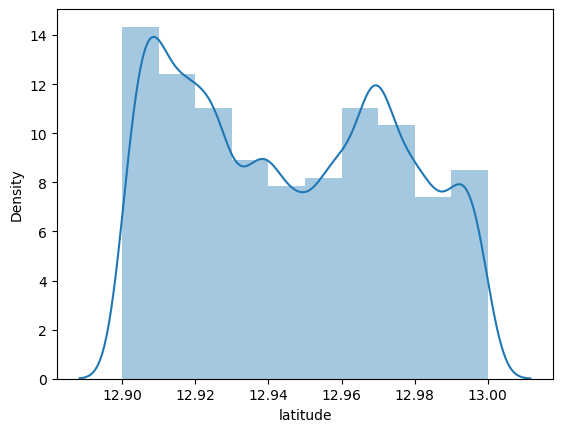

In [40]:
sns.distplot(data['latitude'], bins=10)
pt.show()

<Axes: xlabel='facing', ylabel='count'>

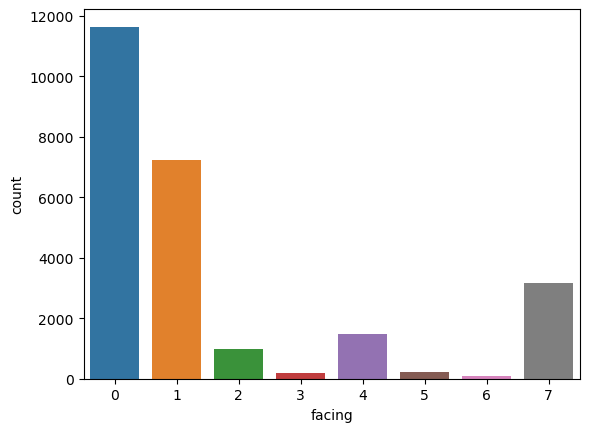

In [41]:
sns.countplot(x='facing',data=data)

<Axes: xlabel='floor', ylabel='count'>

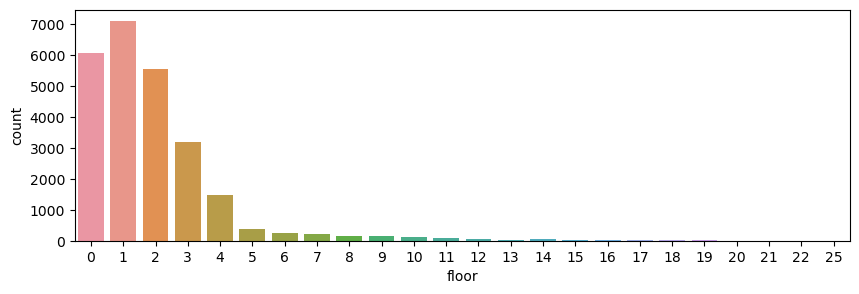

In [42]:
pt.figure(figsize=(10,3))
sns.countplot(x='floor',data=data)

<Axes: xlabel='cup_board', ylabel='count'>

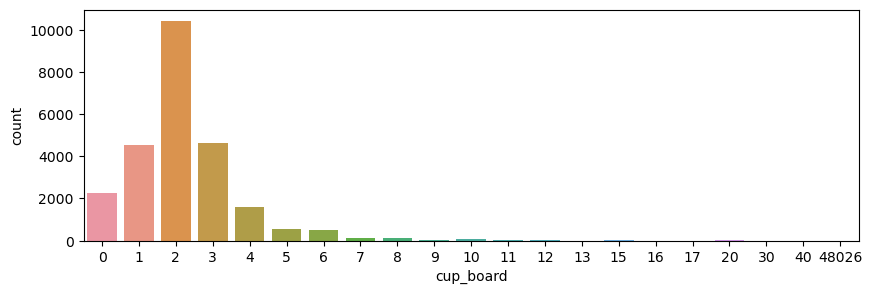

In [43]:
pt.figure(figsize=(10,3))
sns.countplot(x='cup_board',data=data)

<Axes: xlabel='balconies', ylabel='count'>

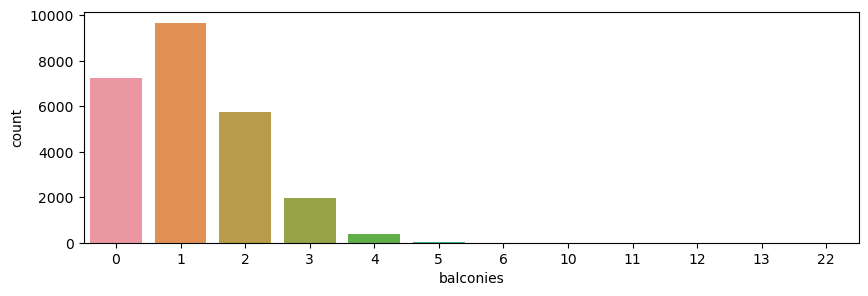

In [44]:
pt.figure(figsize=(10,3))
sns.countplot(x='balconies',data=data)

<Axes: xlabel='water_supply', ylabel='count'>

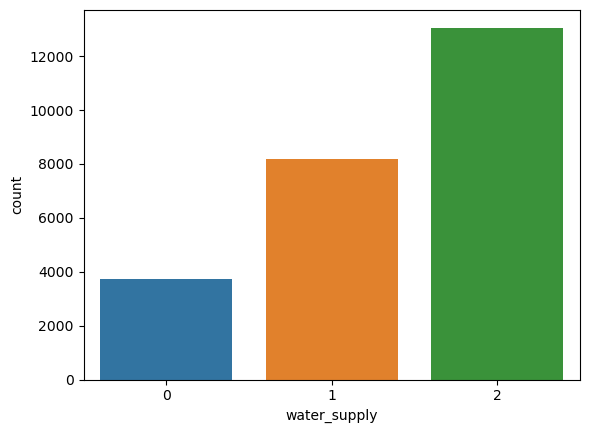

In [45]:
sns.countplot(x='water_supply',data=data)

<Axes: xlabel='negotiable', ylabel='count'>

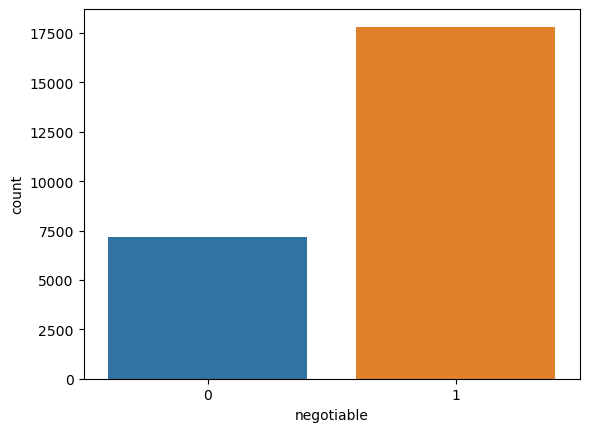

In [46]:
sns.countplot(x='negotiable',data=data)

<Axes: xlabel='GYM', ylabel='count'>

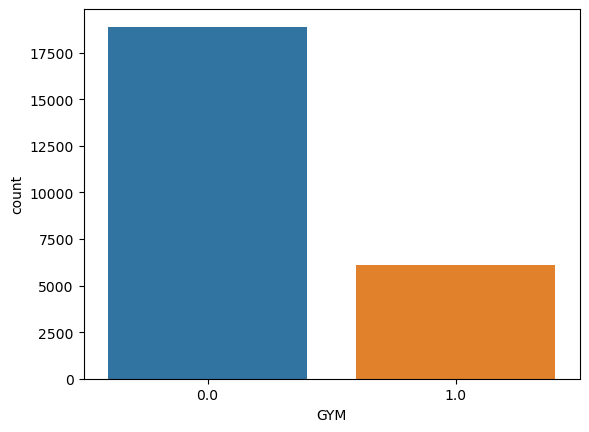

In [47]:
sns.countplot(x='GYM',data=data)

<Axes: xlabel='lift', ylabel='count'>

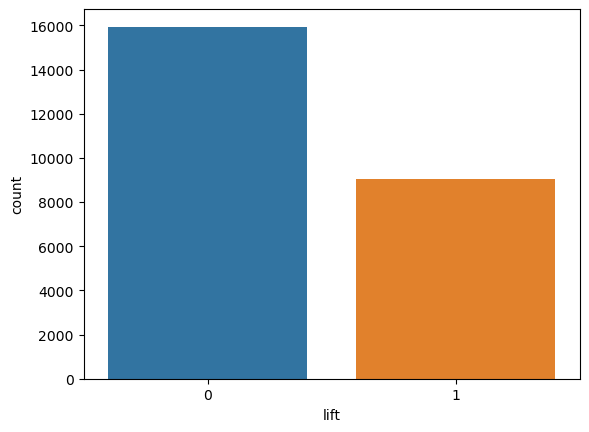

In [48]:
sns.countplot(x='lift',data=data)

<Axes: xlabel='swimming_pool', ylabel='count'>

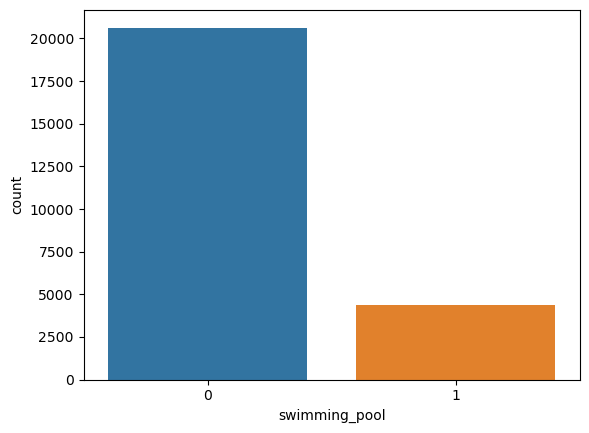

In [49]:
sns.countplot(x='swimming_pool',data=data)

#### Swimming pool present in approx 16% of property

<Axes: xlabel='INTERNET', ylabel='count'>

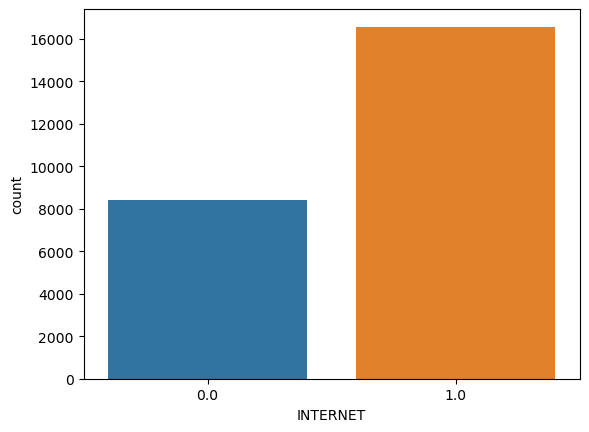

In [50]:
sns.countplot(x='INTERNET',data=data)

<Axes: xlabel='AC', ylabel='count'>

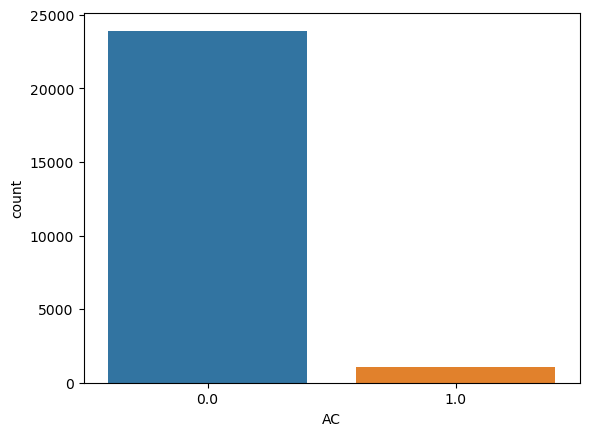

In [51]:
sns.countplot(x='AC',data=data)

#### AC present in approx 4% of property

<Axes: xlabel='CLUB', ylabel='count'>

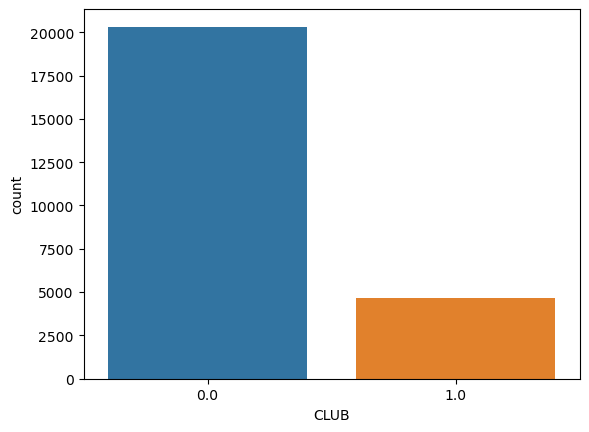

In [52]:
sns.countplot(x='CLUB',data=data)

<Axes: xlabel='INTERCOM', ylabel='count'>

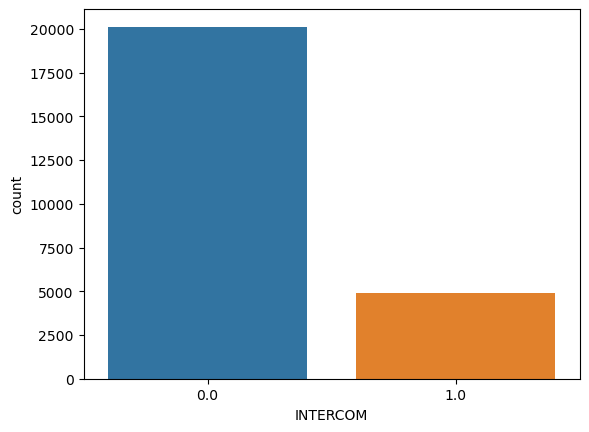

In [53]:
sns.countplot(x='INTERCOM',data=data)

<Axes: xlabel='CPA', ylabel='count'>

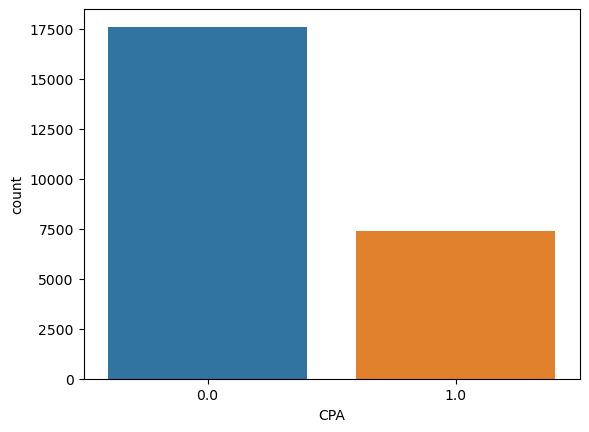

In [54]:
#CPA- COnsumer Protection Act decides whether property to given for residential or business purpose
sns.countplot(x='CPA',data=data)

<Axes: xlabel='FS', ylabel='count'>

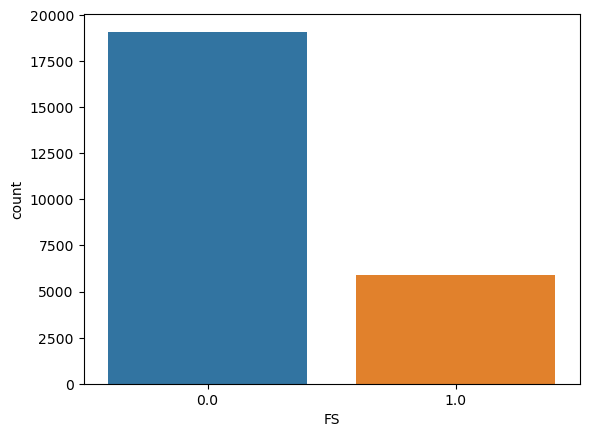

In [55]:
#FS-Full service (rental rates quoted with full service)
sns.countplot(x='FS',data=data)

<Axes: xlabel='SERVANT', ylabel='count'>

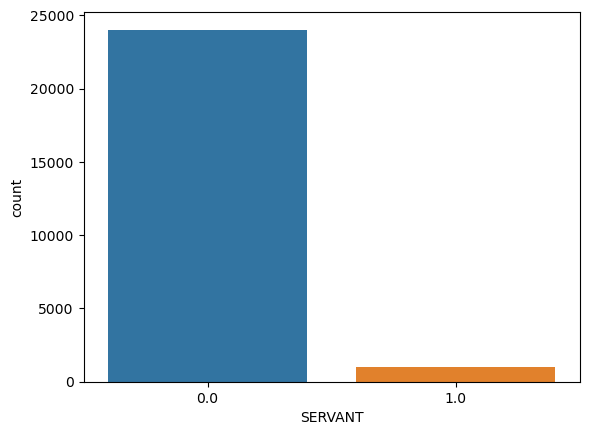

In [56]:
sns.countplot(x='SERVANT',data=data)

#### Servant present in approx 4% of property
#### drop this as initially also approx 5% null values were there in it

<Axes: xlabel='SECURITY', ylabel='count'>

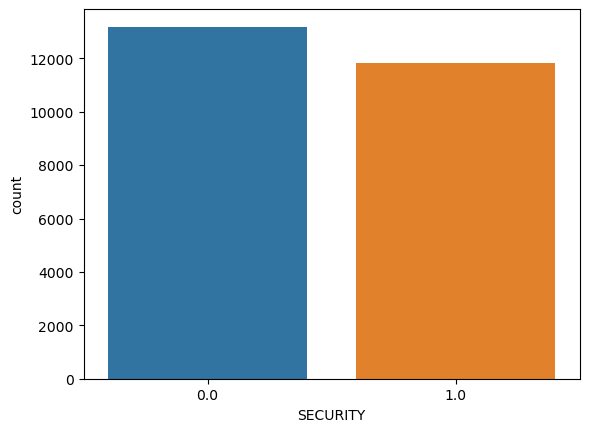

In [57]:
sns.countplot(x='SECURITY',data=data)

##### SC- Settled possession of property

<Axes: xlabel='SC', ylabel='count'>

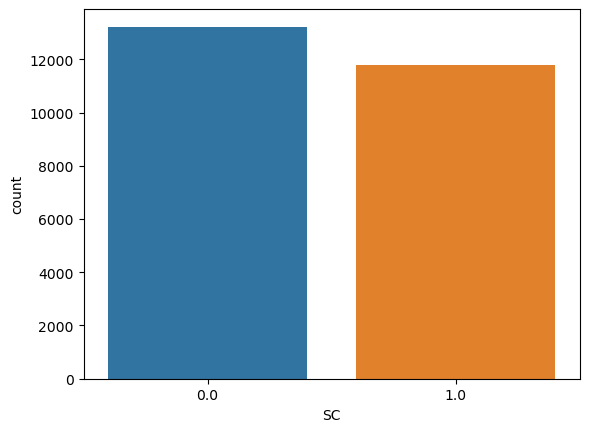

In [58]:

sns.countplot(x='SC',data=data)

##### GP-General Public Scheme Houses

<Axes: xlabel='GP', ylabel='count'>

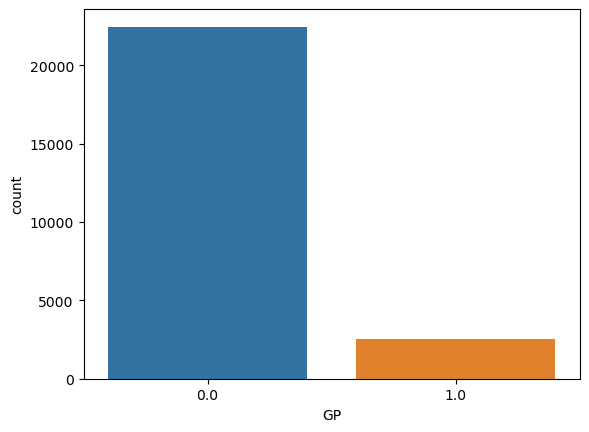

In [59]:

sns.countplot(x='GP',data=data)

#### GP present in approx 10% of property

<Axes: xlabel='PARK', ylabel='count'>

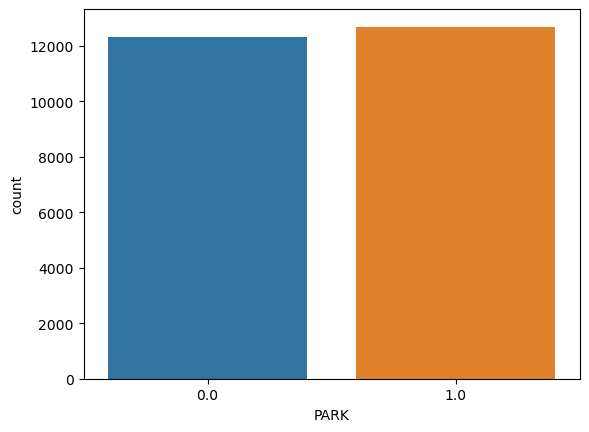

In [60]:
sns.countplot(x='PARK',data=data)

##### RWH-Rainwater Harvesting System

<Axes: xlabel='RWH', ylabel='count'>

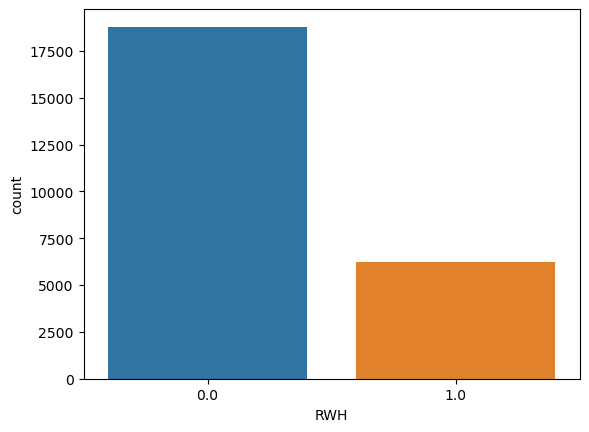

In [61]:

sns.countplot(x='RWH',data=data)

#### RWH present in approx 25% of property

#### STP-Sewage Treatment Plant

<Axes: xlabel='STP', ylabel='count'>

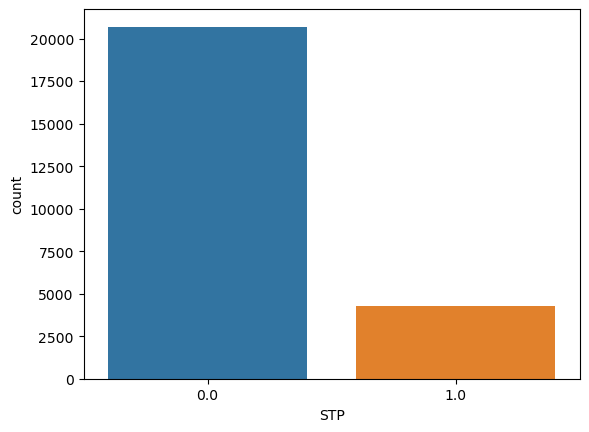

In [62]:

sns.countplot(x='STP',data=data)

#### STP present in approx 15% of property

#### HK-hall and kitchen determination

<Axes: xlabel='HK', ylabel='count'>

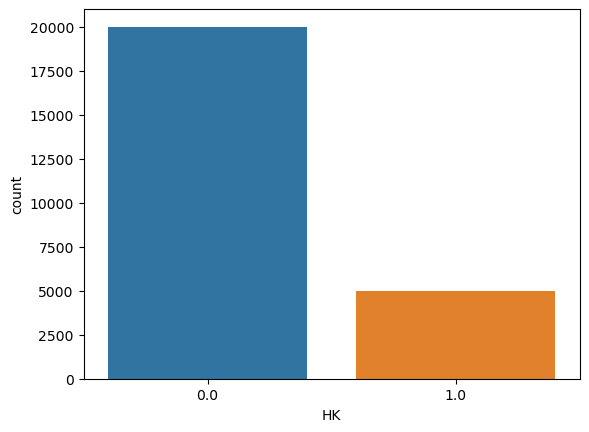

In [63]:

sns.countplot(x='HK',data=data)

#### HK present in approx 18% of property

#### PB- Property has offer but seller still looking for back-up offers

<Axes: xlabel='PB', ylabel='count'>

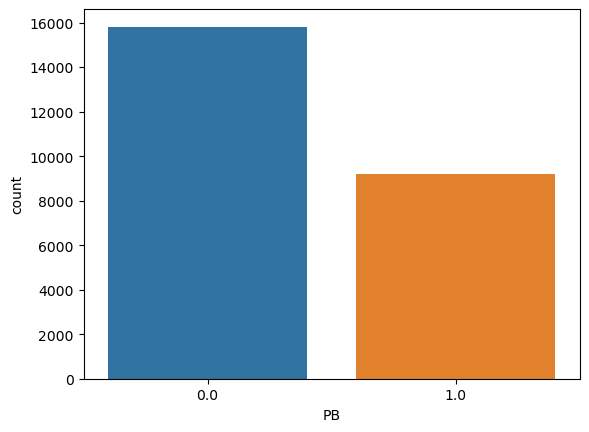

In [64]:

sns.countplot(x='PB',data=data)

#### PB present in approx 36% of property

#### VP-Vacanat Possession

<Axes: xlabel='VP', ylabel='count'>

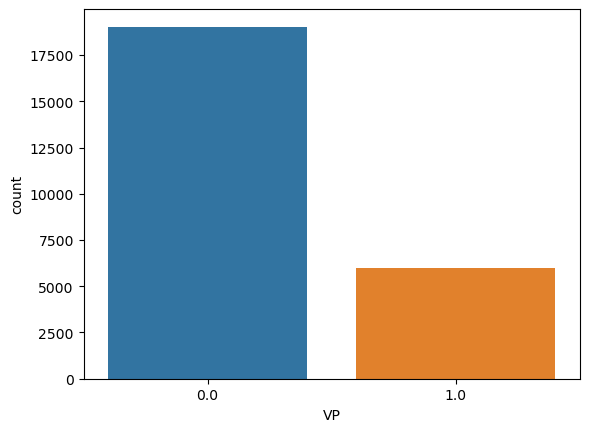

In [65]:

sns.countplot(x='VP',data=data)

#### VP present in approx 24% of property

### DATA TRAINING AND TESTING
#### DEVELOPING MODEL

### Linear Regression

In [66]:
#implementing Linear Regression without dropping any feature

X=data.drop(['rent','deposit'],axis=1)
Y=data['rent']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state =10)

In [68]:
reg=LinearRegression()

In [69]:
reg.fit(X_train,y_train)

LinearRegression()

In [70]:
pdt = reg.predict(X_test)

In [71]:
score = reg.score(X_test,y_test)
print(score*100)

63.24593861997446


In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pdt))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pdt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pdt)))  

Mean Absolute Error: 3796.9401398128643
Mean Squared Error: 26684106.79012058
Root Mean Squared Error: 5165.666151632389


In [73]:
# IMPROVING MODEL BY DROPPING SERVANT

In [74]:
X=data.drop(['SERVANT','rent','deposit'],axis=1)
Y=data['rent']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state =10)

In [76]:
reg=LinearRegression()

In [77]:
reg.fit(X_test,y_test)

LinearRegression()

In [78]:
pdt = reg.predict(X_test)

In [79]:
score = reg.score(X_test,y_test)
print(score*100)

65.8578028218305


In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pdt))  
print(metrics.mean_absolute_percentage_error(y_test, pdt))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pdt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pdt)))  

Mean Absolute Error: 3623.0002462915895
0.20203081973798545
Mean Squared Error: 24787846.603715803
Root Mean Squared Error: 4978.739459312548


In [138]:
sns.regplot(y_test, pdt, scatter_kws={"color": "green"}, line_kws={"color": "blue"})

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

In [82]:
#USING Z-SCORE FOR DETECTING AND CLEANING OUTLIERS

In [83]:
z = np.abs(stats.zscore(data))  #describing z score--abs used for making +ve values
print(z)

           type  locality  latitude  longitude  lease_type      lift  \
0      0.188358  0.087981  0.314299   0.542936    0.999082  0.753976   
1      0.188358  1.183091  1.764073   0.826920    0.999082  0.753976   
2      0.899660  0.145977  0.344926   0.446813    0.999082  1.326302   
3      0.188358  0.563627  0.258082   0.166721    0.999082  1.326302   
4      0.188358  1.657031  0.766374   0.940120    1.029099  1.326302   
...         ...       ...       ...        ...         ...       ...   
24995  0.188358  0.790762  0.806592   0.452530    1.029099  1.326302   
24996  1.276376  1.029571  1.591052   0.246342    0.999082  0.753976   
24997  1.276376  0.362345  1.580411   0.260127    1.029099  0.753976   
24998  1.276376  1.303935  0.492825   0.300401    1.029099  0.753976   
24999  0.188358  0.536334  0.031321   0.696393    0.999082  1.326302   

       swimming_pool  negotiable  furnishing   parking  ...   SERVANT  \
0           0.459928    1.575865    0.360832  1.277498  ...  0

In [84]:
threshold = 3
print(np.where(z > 3))

(array([    4,     5,    10, ..., 24972, 24972, 24981]), array([29,  8, 29, ..., 20, 24, 29]))


In [85]:
#data= data[(z < 3).all(axis=1)] #to remove or filter the outliers and get the clean data.

In [86]:
data.shape

(25000, 39)

#### SVM Model

In [ ]:
x=data.drop(['rent','deposit','SERVANT'],axis=1)
y=data['rent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(x_train,y_train)
y_predict = model_SVR.predict(x_test)
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df.head(10)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
score = model_SVR.score(x_test, y_test)
print(score*100)

In [89]:
df=pd.DataFrame({'Actual':y_test,'predicted':y_predict})
df.head(10)

,Actual,predicted
3486,8500,16241.691516
8342,15000,17840.460942
5836,13000,15919.365253
21275,17000,18430.981297
13191,33000,18006.472789
1151,24000,17772.333143
1648,40000,19317.820707
8973,29000,17722.120211
17455,13000,16746.508059
29,26000,18648.307112


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
#dropping servant
x=data.drop(['rent','deposit','SERVANT'],axis=1)
y=data['rent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 )
# Fit to training set
gbc.fit(x_train, y_train)
# Predict on test set
pred_y = gbc.predict(x_test)
score = gbc.score(x_test, y_test)
print(score*100)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#### USING RANDOM FOREST REGRESSOR MODEL

In [90]:
#dropping servant
x=data.drop(['rent','deposit','SERVANT','locality'],axis=1)
y=data['rent']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [92]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [129]:
clf = RandomForestRegressor(n_estimators=250)
clf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=250)

In [130]:
score=clf.score(x_test,y_test)
print(score*100)

80.81307760441452


In [131]:
pred=clf.predict(x_test)

In [132]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,pred))
print(metrics.mean_absolute_percentage_error(y_test, pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 2639.0735751999996
Mean Squared Error: 14206559.118861001
0.1447261283887095
Root Mean Squared Error: 3769.1589405145814


In [97]:
df=pd.DataFrame({'Actual':y_test,'predicted':pred})
df.head(10)

,Actual,predicted
15962,16500,13724.000
5213,11000,9816.000
7916,12000,12362.600
7763,23000,22893.600
4618,19000,18862.368
11202,12000,12817.980
854,25000,21924.000
3331,23000,22940.000
10839,10000,11718.400
7967,20000,14889.196


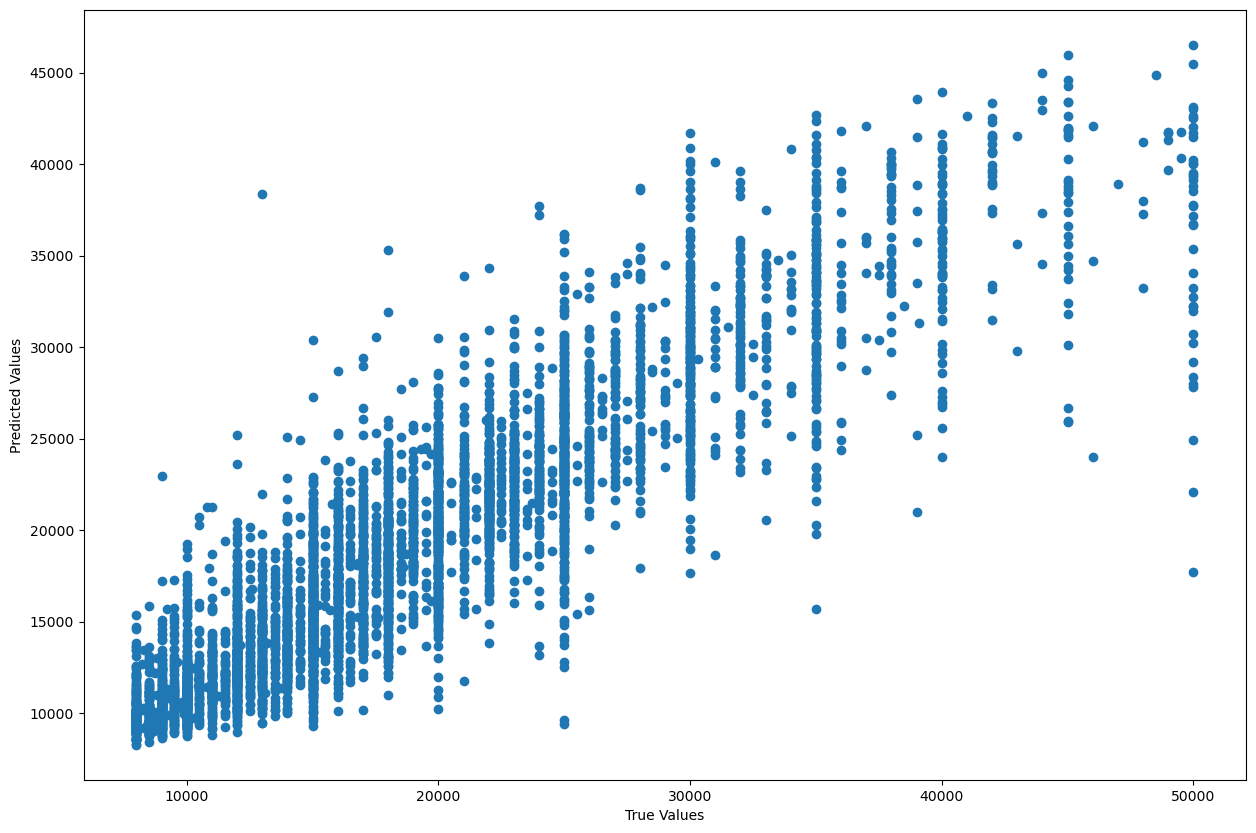

In [98]:
pt.figure(figsize=(15,10))
pt.scatter(y_test,pred)
pt.xlabel('True Values')
pt.ylabel('Predicted Values')
pt.show()

Thus, we get a maximum accuracy of 81.18% and mean absolute error of 2568.25 using Random Forest Regressor by dropping only deposit and SERVANT features and retaining all other features, thus providing maximum flexibility to features to customer.

In [99]:
import pickle

In [100]:
pickle.dump(clf,open('model.pkl','wb'))

In [101]:
model=pickle.load(open('model.pkl','rb'))

In [102]:
# #dropping servant
# x=data.drop(['rent','deposit','SERVANT'],axis=1)
# y=data['rent']

In [103]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# clf=svm.SVC(kernel='linear', C=1).fit(x_train,y_train)

In [104]:
# classifier_predictions=clf.predict(x_test)
# print(accuracy_score(y_test, classifier_predictions)*100)

In [105]:
#dropping servant
# x=data.drop(['rent','deposit','SERVANT'],axis=1)
# y=data['rent']
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# from sklearn.svm import SVC
# Classifier = SVC(kernel="linear")
# Classifier.fit(x_train, y_train)
# # Using the model to predict the labels of the test data
# y_pred = Classifier.predict(x_test)

# # Evaluating the accuracy of the model using the sklearn functions
# accuracy = accuracy_score(y_test,y_pred)*100
# confusion_mat = confusion_matrix(y_test,y_pred)

# # Printing the results
# print("Accuracy for SVM is:",accuracy)
# print("Confusion Matrix")
# print(confusion_mat)

In [106]:
# # Fitting Random Forest Regression to the dataset
# # import the regressor
# from sklearn.ensemble import RandomForestRegressor

# # create regressor object
# regressor = RandomForestRegressor(n_estimators=100,
#                                   random_state=0)

# # fit the regressor with x and y data
# regressor.fit(x, y)


In [107]:
# from sklearn.trees import RandomForestClassifier
# RandomeForest = RandomForestClassifier(oob_score=True)
# RandomForest.fit(x_train,y_train)
# print(RandomForest.oob_score_)


In [108]:
# Classifier.fit(x_train, y_train)

In [18]:
# pt.figure(figsize=(18, 36))
# pt.title('Categorical Features: Distribution')
# pt.xticks(rotation=90)
# index = 1
 
# for col in object_cols:
#     y = data[col].value_counts()
#     pt.subplot(11, 4, index)
#     pt.xticks(rotation=90)
#     sns.barplot(x=list(y.index), y=y)
#     index += 1
# pt.tight_layout()
# pt.show()

In [109]:
# # Using the model to predict the labels of the test data
# y_pred = Classifier.predict(x_test)

# # Evaluating the accuracy of the model using the sklearn functions
# accuracy = accuracy_score(y_test,y_pred)*100
# confusion_mat = confusion_matrix(y_test,y_pred)

# # Printing the results
# print("Accuracy for SVM is:",accuracy)
# print("Confusion Matrix")
# print(confusion_mat)

In [110]:
# x=data.drop(['rent','deposit','SERVANT'],axis=1)
# y=data['rent']
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# from sklearn.svm import SVC
# model = SVC(kernel = 'linear', C = 1)
# model.fit(x_train, y_train) 
# svm_pred = model.predict(x_test)
# accuracy = model.score(x_test, y_test)


In [111]:
# print(score*100)

In [112]:
# from catboost import CatBoostRegressor


In [164]:
pt.figure(figsize=(18, 36))
pt.title('Categorical Features: Distribution')
pt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = data[col].value_counts()
    ax = pt.subplot(11, 4, index)
    pt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y, ax=ax)
    index += 1
    ax.remove()
pt.tight_layout()
pt.show()

/var/folders/s6/xlwdvv0547ld268t3lhsprb00000gn/T/ipykernel_60344/1642615639.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = pt.subplot(11, 4, index)


<Figure size 1800x3600 with 0 Axes>

In [113]:
# from sklearn import svm
# from sklearn.svm import SVC
# from sklearn.metrics import mean_absolute_percentage_error
 
# model_SVR = svm.SVR()
# model_SVR.fit(x_train,y_train)
# Y_pred = model_SVR.predict(x_test)
 
# print(mean_absolute_percentage_error(y_test, Y_pred))

In [114]:
# #dropping servant
# x=data.drop(['rent','deposit','SERVANT'],axis=1)
# y=data['rent']
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [115]:
# cb_model = CatBoostRegressor()
# cb_model.fit(X_train, y_train)
# preds = cb_model.predict(X_valid)
 
# cb_r2_score=r2_score(Y_valid, preds)
# cb_r2_score

In [116]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [117]:
# #dropping servant
# x=data.drop(['rent','deposit','SERVANT'],axis=1)
# y=data['rent']

In [118]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [119]:
# gbc = GradientBoostingClassifier(n_estimators=300,
#                                  learning_rate=0.05,
#                                  random_state=100,
#                                  max_features=5 )

In [120]:
# # Fit to training set
# gbc.fit(x_train, y_train)
 
# # Predict on test set
# pred_y = gbc.predict(x_test)
 
# # accuracy
# acc = accuracy_score(y_test, pred_y)
# print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

In [121]:
# from sklearn.linear_model import LinearRegression # OLS algorithm
# from sklearn.linear_model import Ridge # Ridge algorithm
# from sklearn.linear_model import Lasso # Lasso algorithm
# from sklearn.linear_model import BayesianRidge # Bayesian algorithm
# from sklearn.linear_model import ElasticNet # ElasticNet algorithm

In [122]:

# 1. OLS

# ols = LinearRegression()
# ols.fit(X_train, y_train)
# ols_yhat = ols.predict(x_test)

# # 2. Ridge

# ridge = Ridge(alpha = 0.5)
# ridge.fit(x_train, y_train)
# ridge_yhat = ridge.predict(x_test)

# # 3. Lasso

# lasso = Lasso(alpha = 0.01)
# lasso.fit(x_train, x_train)
# lasso_yhat = lasso.predict(x_test)

# # 4. Bayesian

# bayesian = BayesianRidge()
# bayesian.fit(x_train, y_train)
# bayesian_yhat = bayesian.predict(x_test)

# # 5. ElasticNet

# en = ElasticNet(alpha = 0.01)
# en.fit(x_train, y_train)
# en_yhat = en.predict(x_test)

In [123]:
#check for null values in dataset

# data.isnull().sum()

In [124]:
# from sklearn.metrics import explained_variance_score as evs # evaluation metric
# from sklearn.metrics import r2_score as r2 # evaluation metric


In [125]:
# print('-------------------------------------------------------------------------------')
# print('Explained Variance Score of OLS model is {}',evs(y_test, ols_yhat))
# print('-------------------------------------------------------------------------------')
# print('Explained Variance Score of Ridge model is {}',(evs(y_test, ridge_yhat)))
# print('-------------------------------------------------------------------------------')
# print(('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat))))
# print('-------------------------------------------------------------------------------')
# print(('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat))))
# print('-------------------------------------------------------------------------------')
# print(('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat))))
# print('-------------------------------------------------------------------------------')


In [126]:
# # This code is contributed by @amartajisce
# from catboost import CatBoostRegressor
# cb_model = CatBoostRegressor()
# cb_model.fit(x_train, y_train)
# preds = cb_model.predict(x_test)

# cb_r2_score=r2_score(y_test, preds)
# cb_r2_score


In [139]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [140]:
#dropping servant
x=data.drop(['rent','deposit','SERVANT'],axis=1)
y=data['rent']

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [142]:
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 )

In [143]:
# Fit to training set
gbc.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Predict on test set
pred_y = gbc.predict(x_test)

In [ ]:
score = gbc.score(x_test, y_test)
print(score*100)

In [ ]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))